In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [119]:
df = pd.read_csv('nft_sales.csv')
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,090,222,023","1,790,587","17,670,824","2,130,467"
1,Bored Ape Yacht Club,"$2,439,754,017","12,052","32,670","6,586"
2,CryptoPunks,"$2,388,467,992","6,076","22,269","3,804"
3,Mutant Ape Yacht Club,"$1,744,822,678","23,768","51,775","13,121"
4,Art Blocks,"$1,310,734,558","33,549","184,470","36,091"


In [120]:
df['Collections'].value_counts()

Axie Infinity         1
Tasty Bones           1
OnChainMonkey         1
Blitmap               1
SolPunks              1
                     ..
Lives of Asuna        1
CryptoPhunksV2        1
Rumble Kong League    1
Arcade Land           1
Los Muertos           1
Name: Collections, Length: 250, dtype: int64

In [121]:
df.isnull().sum()

Collections     0
Sales           0
Buyers          0
Txns            0
Owners         19
dtype: int64

In [122]:
df =df.dropna(axis=0)

In [123]:
df['Owners'] = df['Owners'].str.replace(',', '')

In [124]:
df['Owners'] = df['Owners'].astype(int)

In [125]:
df1 = df.sort_values(by='Owners',ascending=False)[:50]

In [127]:
df = df1.set_index('Collections')
df.head()

,Sales,Buyers,Txns,Owners
Collections,,,,
Alien Worlds,"$41,391,160","489,108","5,710,821",3843236
Axie Infinity,"$4,090,222,023","1,790,587","17,670,824",2130467
NBA Top Shot,"$1,032,899,753","446,514","21,817,564",694026
Ethereum Name Service,"$98,708,955","42,087","159,494",487632
Farmers World,"$196,437,030","78,198","5,400,552",292657


In [128]:
df['Sales'] = df['Sales'].apply(lambda x:x[1:])

In [129]:
df['Sales'] = df['Sales'].str.replace(',', '')
df['Buyers'] = df['Buyers'].str.replace(',', '')
df['Txns'] = df['Txns'].str.replace(',', '')
# df['Owners'] = df['Owners'].str.replace(',', '')

In [130]:
df['Sales']= df['Sales'].astype(float)

In [131]:
df['Buyers'] = df['Buyers'].astype(float)
df['Txns'] = df['Txns'].astype(float)
df['Owners'] = df['Owners'].astype(float)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alien Worlds to MurakamiFlowers
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   50 non-null     float64
 1   Buyers  50 non-null     float64
 2   Txns    50 non-null     float64
 3   Owners  50 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB


In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df_nft = scaler.transform(df)

df_nft

array([[-0.45327519,  1.58627597,  1.04424356,  5.99665905],
       [ 5.24750215,  6.56924743,  3.93867515,  3.20291189],
       [ 0.94277466,  1.42319637,  4.94222467,  0.85989134],
       [-0.37257141, -0.12523292, -0.29922903,  0.5232361 ],
       [-0.23496971,  0.01302523,  0.96915559,  0.20520673],
       [-0.42440056, -0.03703501,  1.8330493 , -0.00897193],
       [ 0.10797285,  0.16692745,  0.59095681, -0.01411325],
       [-0.43409903, -0.12219676, -0.00984451, -0.12013989],
       [-0.24109488,  0.01872234, -0.17360855, -0.16271725],
       [ 1.33396768, -0.15792235, -0.29318461, -0.21328551],
       [ 0.97285781, -0.18548133, -0.32338664, -0.21554952],
       [-0.40270158, -0.23492898, -0.3313502 , -0.23587502],
       [-0.47884931, -0.08668175,  0.03382364, -0.23944882],
       [ 0.01156657, -0.17994886, -0.32273999, -0.24110931],
       [-0.44615991, -0.22991338, -0.08806554, -0.25068241],
       [ 1.94516627, -0.19537086, -0.32529803, -0.25075255],
       [-0.37140514, -0.

In [135]:
scaled_df = pd.DataFrame(df_nft,columns=df.columns,index=df.index)

In [136]:
scaled_df

,Sales,Buyers,Txns,Owners
Collections,,,,
Alien Worlds,-0.453275,1.586276,1.044244,5.996659
Axie Infinity,5.247502,6.569247,3.938675,3.202912
NBA Top Shot,0.942775,1.423196,4.942225,0.859891
Ethereum Name Service,-0.372571,-0.125233,-0.299229,0.523236
Farmers World,-0.234970,0.013025,0.969156,0.205207
Gods Unchained Immutable,-0.424401,-0.037035,1.833049,-0.008972
Sorare,0.107973,0.166927,0.590957,-0.014113
NFL All Day,-0.434099,-0.122197,-0.009845,-0.120140
ZED RUN,-0.241095,0.018722,-0.173609,-0.162717


In [137]:
scaled_df = scaled_df.dropna()

In [138]:
scaled_df

,Sales,Buyers,Txns,Owners
Collections,,,,
Alien Worlds,-0.453275,1.586276,1.044244,5.996659
Axie Infinity,5.247502,6.569247,3.938675,3.202912
NBA Top Shot,0.942775,1.423196,4.942225,0.859891
Ethereum Name Service,-0.372571,-0.125233,-0.299229,0.523236
Farmers World,-0.234970,0.013025,0.969156,0.205207
Gods Unchained Immutable,-0.424401,-0.037035,1.833049,-0.008972
Sorare,0.107973,0.166927,0.590957,-0.014113
NFL All Day,-0.434099,-0.122197,-0.009845,-0.120140
ZED RUN,-0.241095,0.018722,-0.173609,-0.162717


In [139]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(scaled_df,method='single',metric='euclidean')

Text(0, 0.5, 'distance')

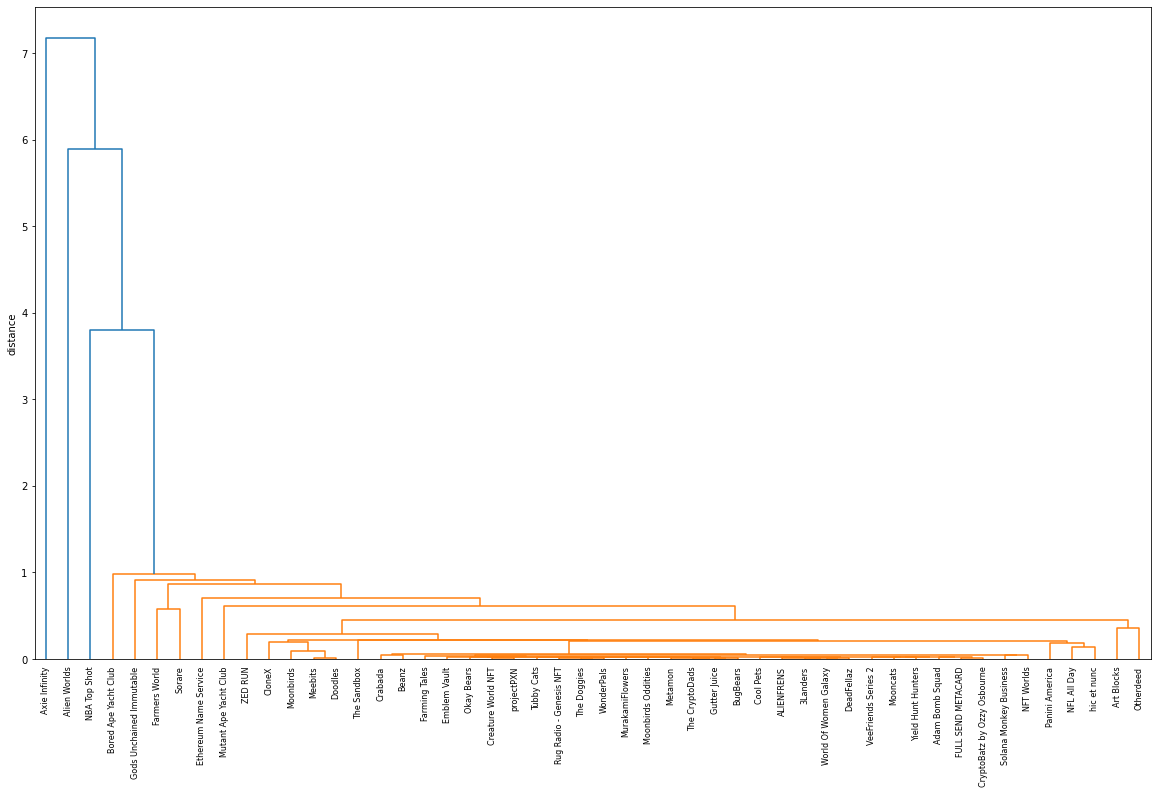

In [140]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [141]:
import scipy.cluster.hierarchy as sch
Z1 = sch.linkage(scaled_df,method='complete',metric='euclidean')

Text(0, 0.5, 'distance')

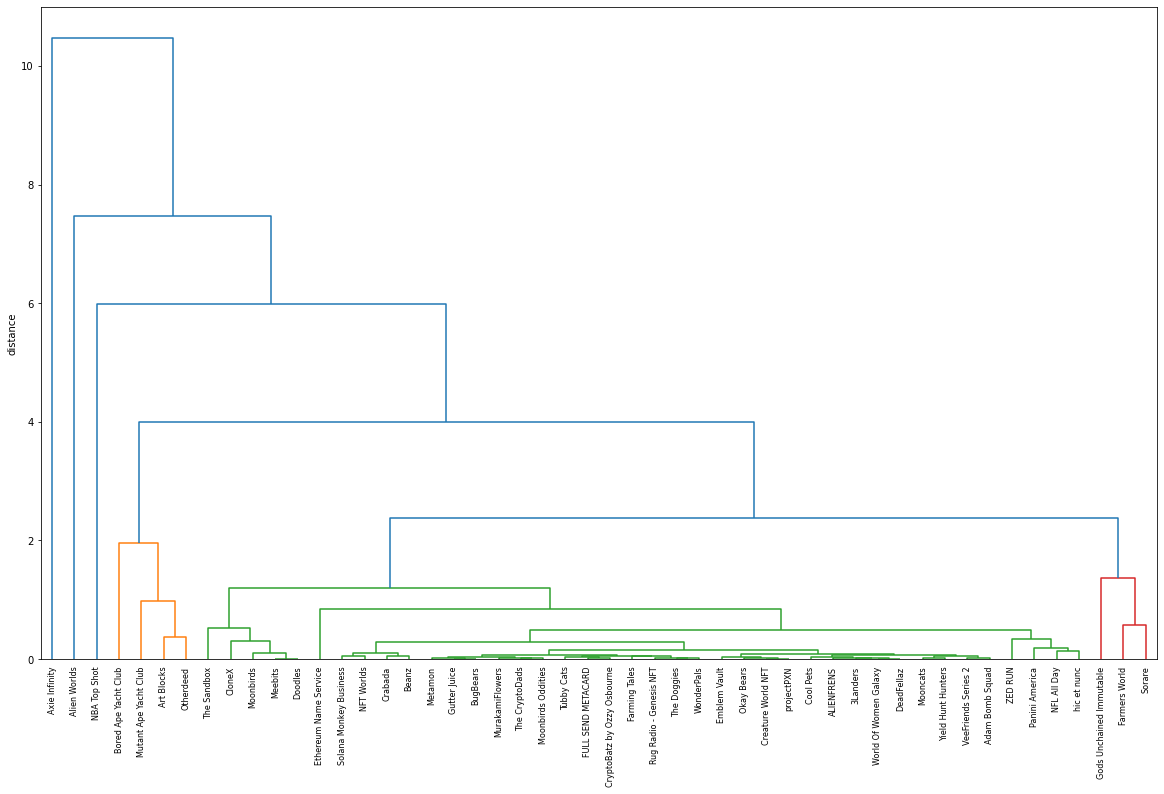

In [142]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z1, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')